In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt

In [2]:
Q = 10
R = 1
x_0 = 0
Ns = 50
k = 100

def f_k_x(x,k, size = None):
    return 0.5*x + 25*x/(1 + x*x) + 8*math.cos(1.2*k) + np.random.normal(loc=0.0, scale=np.sqrt(Q), size=size)

def z_k_x(x, size = None):
    return x**2/20 + np.random.normal(loc=0.0, scale=np.sqrt(R), size=size)

def cal_w(z, ez):
    return 1/(R*np.sqrt(2*math.pi))*np.exp(-1/2*(z - ez)**2/R)

def cal_ez(x):
    return x**2/20

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [3]:
# def resample(x_i, w):
#     c = []
#     i_j = []
#     x_new = x_i.copy()
#     c1 = 0
#     c.append(c1)
#     for i in range(1,Ns):
#         c1 = c[i-1] + w[i]
#         c.append(c1)
#     i = 1
#     for j in range(Ns):
#         u1 = np.random.uniform(0,1/Ns)
#         u_j = u1 + 1/Ns*j
#         while((u_j>c[i])&(i<len(x_i)-1)):
#             i+=1
#         x_new[j] = x_i[i]
#         w[j] = 1/Ns
#         i_j.append(i)
#     return x_new, w, i_j

In [4]:
def resample(x_i, w):
    c = []
    i_j = []
    x_new = x_i.copy()
    c1 = 0
    c.append(c1)
    for i in range(1,Ns):
        c1 = c[i-1] + w[i]
        c.append(c1)
    for j in range(Ns):
        u1 = np.random.uniform(0,1/Ns)
        u_j = u1 + 1/Ns*j
        for i in range(Ns):
            if(u_j<=c[i]):
                x_new[j] = x_i[i]
                w[j] = 1/Ns
                i_j.append(i)
                break
    return x_new, w, i_j

In [5]:
x = 0
z = z_k_x(x)
# Initial particle filter
x_i = f_k_x(x,0,Ns)

list_i_j = []
list_x = []
list_z = []
list_x_est = []
for k in range(1,101):
    x = f_k_x(x,k)
    z = z_k_x(x)
    list_x.append(x)
    list_z.append(z)
    #particle filter
    x_i = f_k_x(x_i, k, Ns)
    ez_i = cal_ez(x_i)
    w = cal_w(z, ez_i)
    #normalize weight
    w = w/sum(w)
    #resample
    x_i,w, i_j = resample(x_i, w)    
    list_i_j.append(i_j)
    x_est = np.mean(x_i)
    list_x_est.append(x_est)

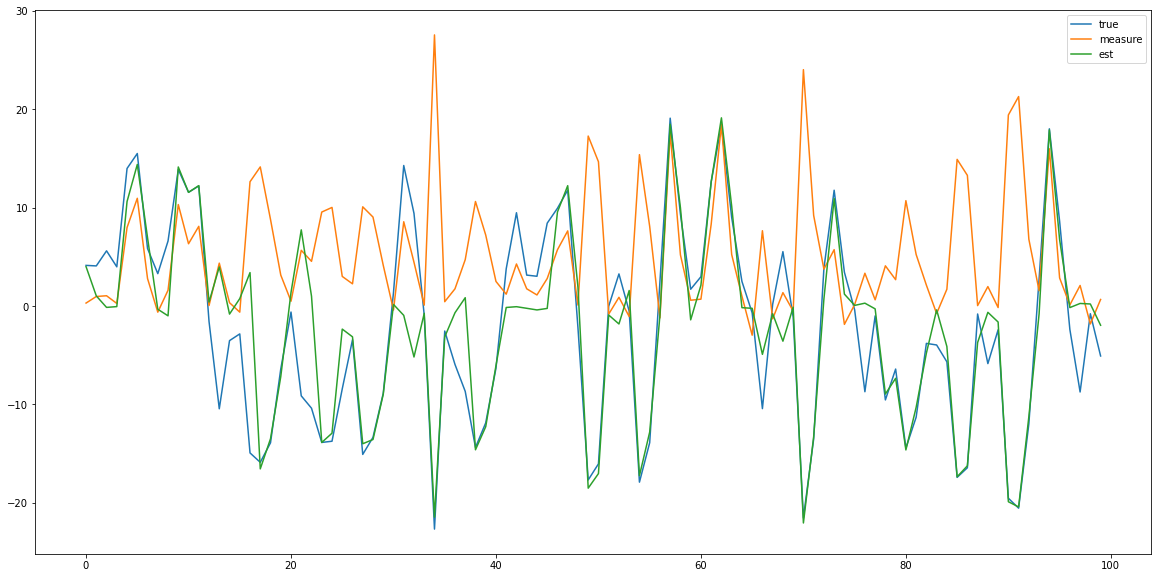

In [6]:
plt.figure(figsize = (20,10))
plt.plot(list_x, label = 'true')
plt.plot(list_z, label = 'measure')
plt.plot(list_x_est, label = 'est')
plt.legend(loc = 'best')

In [7]:
print("RMSE:", rmse(np.array(list_x_est), np.array(list_x)))

RMSE: 4.901476213897802


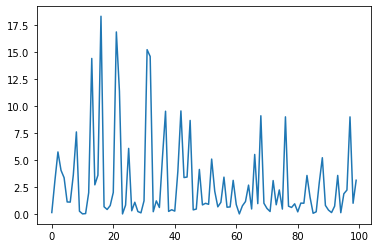

In [8]:
plt.plot(abs(np.array(list_x_est) - np.array(list_x)))